# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import gzip
import shutil
import os
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

import acquire_nick as an
import prepare_nick as pn
import wrangle as w

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = w.wrangle_df()
df.head()

Using cached CSV


,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,release_year,imdb_id,production_company,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,Four Rooms,0,3.493750,Crime Comedy,Tim Roth,Antonio Banderas,Jennifer Beals,24.0,4000000.0,4300000.0,300000.0,6.5,539.0,MiramaxFilms ABandApart,UnitedStatesofAmerica,It's Ted the Bellhop's first night on the job....,9.026586,98.0,0,1995-12-09,1995,tt0113101,MiramaxFilms,0,0,0,0,0,0,1,1,0,0,0,0,0
6,Judgment Night,0,4.854775,Action Thriller Crime,Emilio Estevez,Cuba Gooding Jr.,Denis Leary,15.0,8000000.0,12136938.0,4136938.0,6.4,79.0,UniversalPictures LargoEntertainment JVCEntert...,Japan UnitedStatesofAmerica,"While racing to a boxing match, Frank, Mike, J...",5.538671,110.0,0,1993-10-15,1993,tt0107286,UniversalPictures,0,0,0,0,0,1,1,0,0,1,0,0,0
11,Star Wars,1,285.487448,Adventure Action Science Fiction,Mark Hamill,Harrison Ford,Carrie Fisher,106.0,11000000.0,775398007.0,764398007.0,8.1,6778.0,Lucasfilm TwentiethCenturyFoxFilmCorporation,UnitedStatesofAmerica,Princess Leia is captured and held hostage by ...,42.149697,121.0,1,1977-05-25,1977,tt0076759,Lucasfilm,1,0,0,1,0,0,0,0,0,1,0,0,0
12,Finding Nemo,1,38.013564,Animation Family,Albert Brooks,Ellen DeGeneres,Alexander Gould,24.0,94000000.0,940335536.0,846335536.0,7.6,6292.0,PixarAnimationStudios,UnitedStatesofAmerica,"Nemo, an adventurous young clownfish, is unexp...",25.497794,100.0,1,2003-05-30,2003,tt0266543,PixarAnimationStudios,0,0,0,0,0,0,0,0,1,0,0,0,0
13,Forrest Gump,1,50.537748,Comedy Drama Romance,Tom Hanks,Robin Wright,Gary Sinise,66.0,55000000.0,677945399.0,622945399.0,8.2,8147.0,ParamountPictures,UnitedStatesofAmerica,A man with a low IQ has accomplished great thi...,48.307194,142.0,1,1994-07-06,1994,tt0109830,ParamountPictures,0,0,1,0,1,0,0,1,0,0,0,0,0


In [3]:
df.shape

(7282, 36)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7282 entries, 5 to 443319
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 7282 non-null   object 
 1   success               7282 non-null   int64  
 2   success_rating        7282 non-null   float64
 3   genres                7267 non-null   object 
 4   cast_actor_1          7282 non-null   object 
 5   cast_actor_2          7282 non-null   object 
 6   cast_actor_3          7282 non-null   object 
 7   total_n_cast          7282 non-null   float64
 8   budget                7282 non-null   float64
 9   revenue               7282 non-null   float64
 10  profit_amount         7282 non-null   float64
 11  vote_average          7282 non-null   float64
 12  vote_count            7282 non-null   float64
 13  production_companies  6923 non-null   object 
 14  production_countries  7151 non-null   object 
 15  overview           

In [5]:
df.describe()

,success,success_rating,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,popularity,runtime,profitable,release_year,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary
count,7282.000000,7282.000000,7282.000000,7.282000e+03,7.282000e+03,7.282000e+03,7282.00000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000
mean,0.384510,9.566970,21.654491,2.551717e+07,6.987853e+07,4.436136e+07,6.23245,568.187449,8.621582,108.024718,0.402499,1999.556441,0.151744,0.100659,0.499725,0.101346,0.196237,0.255562,0.148311,0.354298,0.050948,0.237435,0.075391,0.085416,0.023757
std,0.486513,21.569372,18.870119,3.570461e+07,1.474352e+08,1.231651e+08,0.98227,1113.367568,12.228099,21.065622,0.490435,15.502220,0.358797,0.300898,0.500034,0.301807,0.397177,0.436206,0.355432,0.478333,0.219906,0.425540,0.264040,0.279519,0.152302
min,0.000000,0.000000,3.000000,1.020000e+06,1.000000e+00,-1.657101e+08,0.00000,0.000000,0.000001,0.000000,0.000000,1915.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.875969,11.000000,8.000000e+06,2.612360e+06,-6.843298e+06,5.70000,44.000000,4.140868,94.000000,0.000000,1992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.133958,16.000000,8.000000e+06,1.733998e+07,4.000000e+06,6.30000,165.000000,7.506915,104.000000,0.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.483487,25.000000,3.000000e+07,6.869919e+07,4.084713e+07,6.90000,551.750000,10.977723,118.000000,1.000000,2011.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,667.333333,313.000000,3.800000e+08,2.787965e+09,2.550965e+09,10.00000,14075.000000,547.488298,338.000000,1.000000,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['success_rating'] = (df['revenue']/(df['budget'] * 2)) * df['vote_average']

In [7]:
df.head(5)

,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,release_year,imdb_id,production_company,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,Four Rooms,0,3.493750,Crime Comedy,Tim Roth,Antonio Banderas,Jennifer Beals,24.0,4000000.0,4300000.0,300000.0,6.5,539.0,MiramaxFilms ABandApart,UnitedStatesofAmerica,It's Ted the Bellhop's first night on the job....,9.026586,98.0,0,1995-12-09,1995,tt0113101,MiramaxFilms,0,0,0,0,0,0,1,1,0,0,0,0,0
6,Judgment Night,0,4.854775,Action Thriller Crime,Emilio Estevez,Cuba Gooding Jr.,Denis Leary,15.0,8000000.0,12136938.0,4136938.0,6.4,79.0,UniversalPictures LargoEntertainment JVCEntert...,Japan UnitedStatesofAmerica,"While racing to a boxing match, Frank, Mike, J...",5.538671,110.0,0,1993-10-15,1993,tt0107286,UniversalPictures,0,0,0,0,0,1,1,0,0,1,0,0,0
11,Star Wars,1,285.487448,Adventure Action Science Fiction,Mark Hamill,Harrison Ford,Carrie Fisher,106.0,11000000.0,775398007.0,764398007.0,8.1,6778.0,Lucasfilm TwentiethCenturyFoxFilmCorporation,UnitedStatesofAmerica,Princess Leia is captured and held hostage by ...,42.149697,121.0,1,1977-05-25,1977,tt0076759,Lucasfilm,1,0,0,1,0,0,0,0,0,1,0,0,0
12,Finding Nemo,1,38.013564,Animation Family,Albert Brooks,Ellen DeGeneres,Alexander Gould,24.0,94000000.0,940335536.0,846335536.0,7.6,6292.0,PixarAnimationStudios,UnitedStatesofAmerica,"Nemo, an adventurous young clownfish, is unexp...",25.497794,100.0,1,2003-05-30,2003,tt0266543,PixarAnimationStudios,0,0,0,0,0,0,0,0,1,0,0,0,0
13,Forrest Gump,1,50.537748,Comedy Drama Romance,Tom Hanks,Robin Wright,Gary Sinise,66.0,55000000.0,677945399.0,622945399.0,8.2,8147.0,ParamountPictures,UnitedStatesofAmerica,A man with a low IQ has accomplished great thi...,48.307194,142.0,1,1994-07-06,1994,tt0109830,ParamountPictures,0,0,1,0,1,0,0,1,0,0,0,0,0


In [8]:
df[df.success == 1].cast_actor_1.value_counts()

Tom Hanks                   27
Tom Cruise                  27
Sylvester Stallone          21
Clint Eastwood              21
Adam Sandler                18
Denzel Washington           17
Sean Connery                16
Bruce Willis                16
Jim Carrey                  16
Mel Gibson                  16
Ben Stiller                 15
Robert De Niro              15
Johnny Depp                 15
Mark Wahlberg               14
Meryl Streep                14
Will Smith                  14
Paul Newman                 14
Robin Williams              14
Brad Pitt                   13
John Travolta               13
Keanu Reeves                13
Nicolas Cage                13
Shah Rukh Khan              13
Matt Damon                  12
Harrison Ford               12
Steve Martin                12
Kevin Costner               12
George Clooney              12
Leonardo DiCaprio           12
Al Pacino                   12
Arnold Schwarzenegger       12
Robert Redford              11
Eddie Mu

In [9]:
df.groupby('release_year').success.sum().tail(15)

release_year
2003     70
2004     79
2005     79
2006     88
2007     97
2008     98
2009    100
2010    103
2011    108
2012    102
2013    125
2014    110
2015    116
2016    103
2017     43
Name: success, dtype: int64

<AxesSubplot:xlabel='id'>

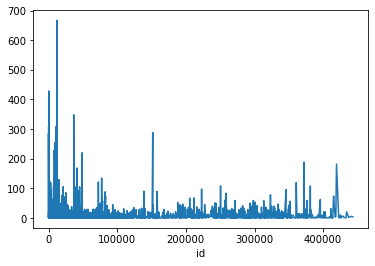

In [10]:
df.success_rating.plot()

In [11]:
df['success'] = (df['success_rating'] > 6.5) * 1

In [12]:
df.sample(5)

,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,release_year,imdb_id,production_company,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2163,Breakdown,0,4.597922,Drama Action Thriller,Kurt Russell,J.T. Walsh,Kathleen Quinlan,15.0,36000000.0,50159144.0,14159144.0,6.6,202.0,ParamountPictures DinoDeLaurentiisCompany Spel...,UnitedStatesofAmerica,When his SUV breaks down on a remote Southwest...,7.926621,95.0,0,1997-05-02,1997,tt0118771,ParamountPictures,0,0,1,0,0,1,0,0,0,1,0,0,0
78235,Bad Medicine,0,0.755284,Comedy,Steve Guttenberg,Alan Arkin,Julie Hagerty,6.0,8000000.0,2685453.0,-5314547.0,4.5,10.0,NaN,UnitedStatesofAmerica,Jeff Marx wants to study medicine and become a...,2.945479,98.0,0,1985-11-22,1985,tt0088765,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0
177494,Veronica Mars,0,1.887777,Comedy Drama Crime,Kristen Bell,Jason Dohring,Enrico Colantoni,53.0,6000000.0,3485127.0,-2514873.0,6.5,482.0,WarnerBros. WarnerBros.InteractiveEntertainmen...,UnitedStatesofAmerica,Years after walking away from her past as a te...,7.510159,107.0,0,2014-03-13,2014,tt2771372,WarnerBros.,0,0,1,0,0,0,1,1,0,0,0,0,0
9350,Cliffhanger,1,11.110723,Action Adventure Thriller,Sylvester Stallone,John Lithgow,Michael Rooker,15.0,70000000.0,255000211.0,185000211.0,6.1,600.0,TriStarPictures Canal+ CarolcoPictures RCSVide...,France Italy UnitedStatesofAmerica,"A year after losing his friend in a tragic 4,0...",9.830853,112.0,1,1993-05-28,1993,tt0106582,TriStarPictures,1,0,0,0,0,1,0,0,0,1,0,0,0
187022,A Touch of Sin,0,0.070317,Drama,Jiang Wu,Wang Baoqiang,Zhao Tao,7.0,8000000.0,154120.0,-7845880.0,7.3,83.0,OfficeKitano XstreamPictures ShanghaiFilmGroup,China France Japan,Four independent stories set in modern China a...,6.303552,133.0,0,2013-10-04,2013,tt2852400,OfficeKitano,0,0,1,0,0,0,0,0,0,0,0,0,0


In [13]:
def train_validate_test_split(df):
    ''' 
    This function takes in a dataframe and splits it 80:20.  The 20% will be our testing datafrme for our final model.  The 80% will be split a second time (70:30), creating our final training dataframe and a dataframe to validate our model with before testing.  Leaving us we a Train (56%), Validate(24%) and Test (20%) Dataframe from our original data (100%)
    '''
    
    train, test = train_test_split(df, 
                               train_size = 0.8,
                               random_state=1313)
    
    
    train, validate = train_test_split(train,
                                  train_size = 0.7,
                                  random_state=1313)
    
    
    return train, validate, test


train, validate, test = train_validate_test_split(df)

train.shape, validate.shape, test.shape

((4077, 36), (1748, 36), (1457, 36))

# Scaling and One Hot Encoding

In [14]:
# Scaling
# Columns to be scaled: 
scaler = MinMaxScaler()


In [15]:
# One Hot Encode for Genres

# df['is_genre_adventure'] = df.genres.apply(lambda genre_list: 'Adventure' in genre_list)
# df['is_genre_horror'] = df.genres.apply(lambda genre_list: 'Horror' in genre_list)
# df['is_genre_drama'] = df.genres.apply(lambda genre_list: 'Drama' in genre_list)
# df['is_genre_scifi'] = df.genres.apply(lambda genre_list: 'Science' in genre_list)
# df['is_genre_romance'] = df.genres.apply(lambda genre_list: 'Romance' in genre_list)
# df['is_genre_thriller'] = df.genres.apply(lambda genre_list: 'Thriller' in genre_list)
# df['is_genre_crime'] = df.genres.apply(lambda genre_list: 'Crime' in genre_list)
# df['is_genre_comedy'] = df.genres.apply(lambda genre_list: 'Comedy' in genre_list)
# df['is_genre_animation'] = df.genres.apply(lambda genre_list: 'Animation' in genre_list)
# df['is_genre_action'] = df.genres.apply(lambda genre_list: 'Action' in genre_list)
# df['is_genre_mystery'] = df.genres.apply(lambda genre_list: 'Mystery' in genre_list)
# df['is_genre_fantasy'] = df.genres.apply(lambda genre_list: 'Fantasy' in genre_list)
# df['is_genre_documentary'] = df.genres.apply(lambda genre_list: 'Documentary' in genre_list)

In [16]:
# One Hot Encode Production Company


In [17]:
df.production_company.value_counts()

UniversalPictures                                                  400
ParamountPictures                                                  386
TwentiethCenturyFoxFilmCorporation                                 291
ColumbiaPictures                                                   235
NewLineCinema                                                      187
WarnerBros.                                                        162
WaltDisneyPictures                                                 146
Metro-Goldwyn-Mayer(MGM)                                           109
ColumbiaPicturesCorporation                                        105
UnitedArtists                                                      101
MiramaxFilms                                                        97
TriStarPictures                                                     96
VillageRoadshowPictures                                             74
FoxSearchlightPictures                                              68
DreamW

In [18]:
# Variables for constructing models
x_train = train.drop(columns=['success', 'revenue', 'vote_average', 'success_rating'])
y_train = train.success

x_validate = validate.drop(columns=['success', 'revenue', 'vote_average', 'success_rating'])
y_validate = validate.success

x_test = test.drop(columns=['success', 'revenue', 'vote_average', 'success_rating'])
y_test = test.success

In [19]:
train.success.value_counts()

0    2531
1    1546
Name: success, dtype: int64

In [20]:
# Now that our training sample is ready, lets set up a baseline accuracy to improve upon
train['baseline'] = 0

baseline_accuracy = (train.baseline == train.success).mean()
print(f'Our baseline accuracy is {baseline_accuracy: .2%}')


Our baseline accuracy is  62.08%


In [21]:
# # Random Forest #

# # Make the Model
# forest = RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=1313)

# # Fit the Model
# forest.fit(x_train, y_train)

# # Use the Model
# y_pred = forest.predict(x_train)


# performance = classification_report(y_train, y_pred, output_dict=True)

# # Classification Report
# pd.DataFrame(performance).transpose()

In [22]:
# Logistic Regression

# Make the Model
logit = LogisticRegression(C=10, random_state=1313)

# Select the Features we want focused on
features = ['runtime', 'budget']

# Fit the Model
logit.fit(x_train[features], y_train)

# Predictions
y_pred = logit.predict(x_train[features])

# Model Score
m_score = logit.score(x_train[features], y_train)

performance = classification_report(y_train, y_pred, output_dict=True, zero_division=0)

# Classification Report
pd.DataFrame(performance).transpose()


,precision,recall,f1-score,support
0,0.620800,1.0000,0.766041,2531.0000
1,0.000000,0.0000,0.000000,1546.0000
accuracy,0.620800,0.6208,0.620800,0.6208
macro avg,0.310400,0.5000,0.383021,4077.0000
weighted avg,0.385392,0.6208,0.475558,4077.0000


### Test different target variables

In [25]:
df_copy = df.copy()

In [26]:
df_copy.head(1)

,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,release_year,imdb_id,production_company,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,Four Rooms,0,3.49375,Crime Comedy,Tim Roth,Antonio Banderas,Jennifer Beals,24.0,4000000.0,4300000.0,300000.0,6.5,539.0,MiramaxFilms ABandApart,UnitedStatesofAmerica,It's Ted the Bellhop's first night on the job....,9.026586,98.0,0,1995-12-09,1995,tt0113101,MiramaxFilms,0,0,0,0,0,0,1,1,0,0,0,0,0


In [30]:
df_copy['success'] = (df_copy['success_rating'] > 6.5)
df_copy['success'].value_counts(normalize=True)

False    0.61549
True     0.38451
Name: success, dtype: float64

In [31]:
df_copy['success'] = (df_copy['success_rating'] > 7)
df_copy['success'].value_counts(normalize=True)

False    0.639797
True     0.360203
Name: success, dtype: float64

In [32]:
df_copy['success'] = (df_copy['success_rating'] > 7.5)
df_copy['success'].value_counts(normalize=True)

False    0.659984
True     0.340016
Name: success, dtype: float64

In [34]:
df_copy['success'] = (df_copy['success_rating'] > 8.5)
df_copy['success'].value_counts(normalize=True)

False    0.695276
True     0.304724
Name: success, dtype: float64

In [35]:
df_copy['success'] = (df_copy['success_rating'] > 9)
df_copy['success'].value_counts(normalize=True)

False    0.710244
True     0.289756
Name: success, dtype: float64

In [36]:
df_copy['success'] = (df_copy['success_rating'] > 10)
df_copy['success'].value_counts(normalize=True)

False    0.736885
True     0.263115
Name: success, dtype: float64

In [37]:
df_copy['success'] = (df_copy['success_rating'] > 12)
df_copy['success'].value_counts(normalize=True)

False    0.782752
True     0.217248
Name: success, dtype: float64

In [43]:
df_copy['success'] = (df_copy['success_rating'] > 6.5) * 1

sns.relplot(data=df.copy, y=success_ratings)

NameError: name 'success_ratings' is not defined

In [ ]:
# TAKEAWAYS/NOTES #
# Anything over 9 would need to have had either made more than double the budget, or get close to a perfect rating
# 